In [3]:
import numpy as np

In [4]:
# Creating df
A = np.array([
        [ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]
    ])

In [5]:
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [6]:
A.shape

(6, 2)

In [7]:
# Checking if the dataset is in Standard Normal Distribution (mean=0, std=1)

np.mean(A), np.std(A[1])

(0.0, 1.0)

In [8]:
# Converting array to df
import pandas as pd
df = pd.DataFrame(A, columns=['a0', 'a1'])

In [9]:
df

,a0,a1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [10]:
# Finding covariances between two columns cov = sum of all rows((c1-mean(c1)) (c2-mean(c2)))/ m-1
#cov = E((3-0)(7-0))/5 + ((-4-0)(-6-0))/5 + etc

a0 = A[:,0] # All rows first column
a1 = A[:,1] # All rows second column

np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

In [11]:
np.sum(a0*a1)/5 # Covariance for col1, row 1

25.0

In [12]:
A.T @ A/5 # Covariance with transpose and matrix multiplication

array([[20., 25.],
       [25., 40.]])

In [13]:
sigma = A.T @ A/5

In [14]:
# eigenvalues value of the vector

np.linalg.eig(sigma)

(array([ 3.07417596, 56.92582404]),
 array([[-0.82806723, -0.56062881],
        [ 0.56062881, -0.82806723]]))

First aray is storing the eigenvalues. The second of these values is lambda (first principal component - higher value). The first value is the second principal component (lower value).

In [15]:
l, x = np.linalg.eig(sigma)

In [16]:
l

array([ 3.07417596, 56.92582404])

In [17]:
x

array([[-0.82806723, -0.56062881],
       [ 0.56062881, -0.82806723]])

In [18]:
# Calculating PC1
sigma @ x[:,0]

array([-2.54562438,  1.72347161])

In [19]:
sigma @ x[:,1]

array([-31.91425695, -47.13840945])

In [20]:
# Transforming data
pc1_arr = A @ x[:,1] # Multiplying by first princiapl component
pc2_arr = A @ x[:,0] # Multipying by second principal component

In [24]:
pc1_arr

array([ -7.47835704,   7.21091862, -10.54893951,   0.26743842,
         3.07058247,   7.47835704])

In [25]:
pc2_arr

array([ 1.44019997, -0.05150393, -1.31144014, -1.38869604,  2.75164011,
       -1.44019997])

### Decomposing with sklearn

We can do the same with the help of sklearn PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA()

In [23]:
pca.fit_transform(A)

array([[ 7.47835704,  1.44019997],
       [-7.21091862, -0.05150393],
       [10.54893951, -1.31144014],
       [-0.26743842, -1.38869604],
       [-3.07058247,  2.75164011],
       [-7.47835704, -1.44019997]])

In [26]:
pca.explained_variance_ratio_

array([0.94876373, 0.05123627])

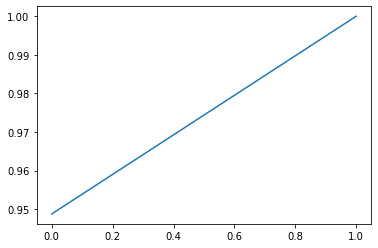

In [27]:
# Plotting screenplot
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

### PCA on glass dataset

In [42]:
dfg = pd.read_csv('C:/Users/kskua/Documents/JupyterNotebooks/INeuron FULL STACK DS notebooks/datasets/glass.csv') 

In [43]:
dfg

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [44]:
X = dfg.drop(columns=['Type'])
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [45]:
# Checking for Standard Normal Distribution
X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [46]:
# Applying Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [47]:
# Converting to df
df_scaled = pd.DataFrame(x_scaled)

In [49]:
# PCA with sklearn
transfomerd= pca.fit_transform(df_scaled)
transfomed

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

In [50]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

Text(0, 0.5, 'EVR')

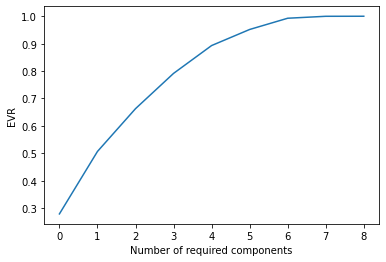

In [39]:
# Plotting Screenplot
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of required components')
plt.ylabel('EVR')

It seems like the best number of components is 5 (above 90% relationships of the dataset). Let's perform the pca with the number of components 5. 

In [52]:
# Creating new PCA with 5 components, transofrming the data in standard normal distribution
pca_5  = PCA(n_components=5)
d5 = pca_5.fit_transform(x_scaled)

# Putting new data into new dataframe
X_5 = pd.DataFrame(d5, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
X_5

,PC1,PC2,PC3,PC4,PC5
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090
...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227
210,-2.397652,3.108236,-1.117502,0.288454,0.624723
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008


In [53]:
# Storing label column in the y variable
y = dfg['Type']

### Building classifier 

In [55]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [56]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

### Classification with the base dataset (without PCA)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [62]:
dt = DecisionTreeClassifier()
dt.fit(X_5,y)

DecisionTreeClassifier()

In [63]:
# Simulating input from the user - in a pipeline of trasnfomers
dt.predict(pca_5.transform(scaler.transform([[1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0]])))

array([1], dtype=int64)

In [ ]:
For more reference go here: https://colab.research.google.com/drive/1nHsA68jga9An0ARcspJVwM-ryPSBqBRh